In [1]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

In [2]:
plotting.setup_mpl()
ff1.Cache.enable_cache('cache')

In [3]:
race = ff1.get_session(2021, 'Abu Dhabi', 'Q')
race.load(telemetry=True)

core           INFO 	Loading data for Abu Dhabi Grand Prix - Qualifying [v3.0.7]
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data h

In [6]:
laps = race.laps

laps_ver = laps.pick_driver('VER')
laps_ham = laps.pick_driver('HAM')

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_ham = laps_ham.pick_fastest().get_telemetry().add_distance()

fastest_ver['Driver'] = 'VER'
fastest_ham['Driver'] = 'HAM'

telemetry = fastest_ver.append(fastest_ham)
telemetry

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver
2,2021-12-11 13:52:51.006,0 days 01:07:50.822000,,366.041667,0 days 00:00:00,11049,234,5,100,False,8,interpolation,0.000075,OnTrack,532,2076,-241,0.000000,VER
3,2021-12-11 13:52:51.029,0 days 01:07:50.845000,,366.041667,0 days 00:00:00.023000,11005,235,5,100,False,8,pos,0.000368,OnTrack,546,2077,-239,1.501389,VER
4,2021-12-11 13:52:51.036,0 days 01:07:50.852000,,366.041667,0 days 00:00:00.030000,10918,238,6,100,False,8,car,0.000458,OnTrack,550,2077,-238,1.964167,VER
5,2021-12-11 13:52:51.249,0 days 01:07:51.065000,,366.041667,0 days 00:00:00.243000,11070,240,6,100,False,8,pos,0.003206,OnTrack,692,2096,-239,16.164167,VER
6,2021-12-11 13:52:51.276,0 days 01:07:51.092000,11,366.041667,0 days 00:00:00.270000,11222,243,6,100,False,8,car,0.003559,OnTrack,710,2098,-239,17.986667,VER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,2021-12-11 14:02:39.238,0 days 01:17:39.054000,16,1990.195000,0 days 00:01:22.002000,12220,220,5,100,False,8,car,0.994086,OnTrack,235,2047,-237,5198.091944,HAM
718,2021-12-11 14:02:39.329,0 days 01:17:39.145000,16,1992.561667,0 days 00:01:22.093000,11893,224,5,100,False,8,pos,0.995175,OnTrack,292,2051,-238,5203.754167,HAM
719,2021-12-11 14:02:39.478,0 days 01:17:39.294000,16,1994.928333,0 days 00:01:22.242000,11567,228,5,100,False,8,car,0.996992,OnTrack,381,2057,-238,5213.190833,HAM
720,2021-12-11 14:02:39.549,0 days 01:17:39.365000,16,1994.928333,0 days 00:01:22.313000,11364,232,5,100,False,8,pos,0.997872,OnTrack,425,2061,-239,5217.766389,HAM


In [11]:
num_minisectors = 25
total_distance = total_distance = max(telemetry['Distance'])
minisector_length = total_distance / num_minisectors
print(minisector_length)

209.14485555555567


In [12]:
minisectors = [0]
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
print(minisectors)

[0, 209.14485555555567, 418.28971111111133, 627.434566666667, 836.5794222222227, 1045.7242777777783, 1254.869133333334, 1464.0139888888896, 1673.1588444444453, 1882.303700000001, 2091.4485555555566, 2300.5934111111123, 2509.738266666668, 2718.883122222224, 2928.027977777779, 3137.172833333335, 3346.3176888888906, 3555.4625444444464, 3764.607400000002, 3973.7522555555574, 4182.897111111113, 4392.041966666669, 4601.186822222225, 4810.33167777778, 5019.476533333336]


In [17]:
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [18]:
telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector
2,2021-12-11 13:52:51.006,0 days 01:07:50.822000,,366.041667,0 days 00:00:00,11049,234,5,100,False,8,interpolation,0.000075,OnTrack,532,2076,-241,0.000000,VER,1
3,2021-12-11 13:52:51.029,0 days 01:07:50.845000,,366.041667,0 days 00:00:00.023000,11005,235,5,100,False,8,pos,0.000368,OnTrack,546,2077,-239,1.501389,VER,1
4,2021-12-11 13:52:51.036,0 days 01:07:50.852000,,366.041667,0 days 00:00:00.030000,10918,238,6,100,False,8,car,0.000458,OnTrack,550,2077,-238,1.964167,VER,1
5,2021-12-11 13:52:51.249,0 days 01:07:51.065000,,366.041667,0 days 00:00:00.243000,11070,240,6,100,False,8,pos,0.003206,OnTrack,692,2096,-239,16.164167,VER,1
6,2021-12-11 13:52:51.276,0 days 01:07:51.092000,11,366.041667,0 days 00:00:00.270000,11222,243,6,100,False,8,car,0.003559,OnTrack,710,2098,-239,17.986667,VER,1


In [21]:
average_speed = telemetry.groupby(['Minisector','Driver'])['Speed'].mean().reset_index()
average_speed.head()

,Minisector,Driver,Speed
0,1,HAM,260.615385
1,1,VER,260.461538
2,2,HAM,233.035714
3,2,VER,236.482759
4,3,HAM,219.600000


In [23]:
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()].reset_index()
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})
fastest_driver.head()

,Minisector,Fastest_driver
0,1,HAM
1,2,VER
2,3,HAM
3,4,HAM
4,5,VER


In [24]:
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])
telemetry = telemetry.sort_values(by=['Distance'])
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'HAM', 'Fastest_driver_int'] = 2
telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,...,RelativeDistance,Status,X,Y,Z,Distance,Driver,Minisector,Fastest_driver,Fastest_driver_int
0,2021-12-11 13:52:51.006,0 days 01:07:50.822000,,366.041667,0 days 00:00:00,11049,234,5,100,False,...,0.000075,OnTrack,532,2076,-241,0.000000,VER,1,HAM,2.0
26,2021-12-11 14:01:17.236,0 days 01:16:17.052000,,3313.952500,0 days 00:00:00,11121,237,6,100,False,...,0.000015,OnTrack,544,2076,-239,0.000000,HAM,1,HAM,2.0
1,2021-12-11 13:52:51.029,0 days 01:07:50.845000,,366.041667,0 days 00:00:00.023000,11005,235,5,100,False,...,0.000368,OnTrack,546,2077,-239,1.501389,VER,1,HAM,2.0
2,2021-12-11 13:52:51.036,0 days 01:07:50.852000,,366.041667,0 days 00:00:00.030000,10918,238,6,100,False,...,0.000458,OnTrack,550,2077,-238,1.964167,VER,1,HAM,2.0
27,2021-12-11 14:01:17.309,0 days 01:16:17.125000,,3313.952500,0 days 00:00:00.073000,11173,238,6,100,False,...,0.000949,OnTrack,593,2083,-239,4.826111,HAM,1,HAM,2.0


/var/folders/pr/b_ytjflj1fqffyn22t_b8x_m0000gn/T/ipykernel_96947/3125142754.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('winter', 2)


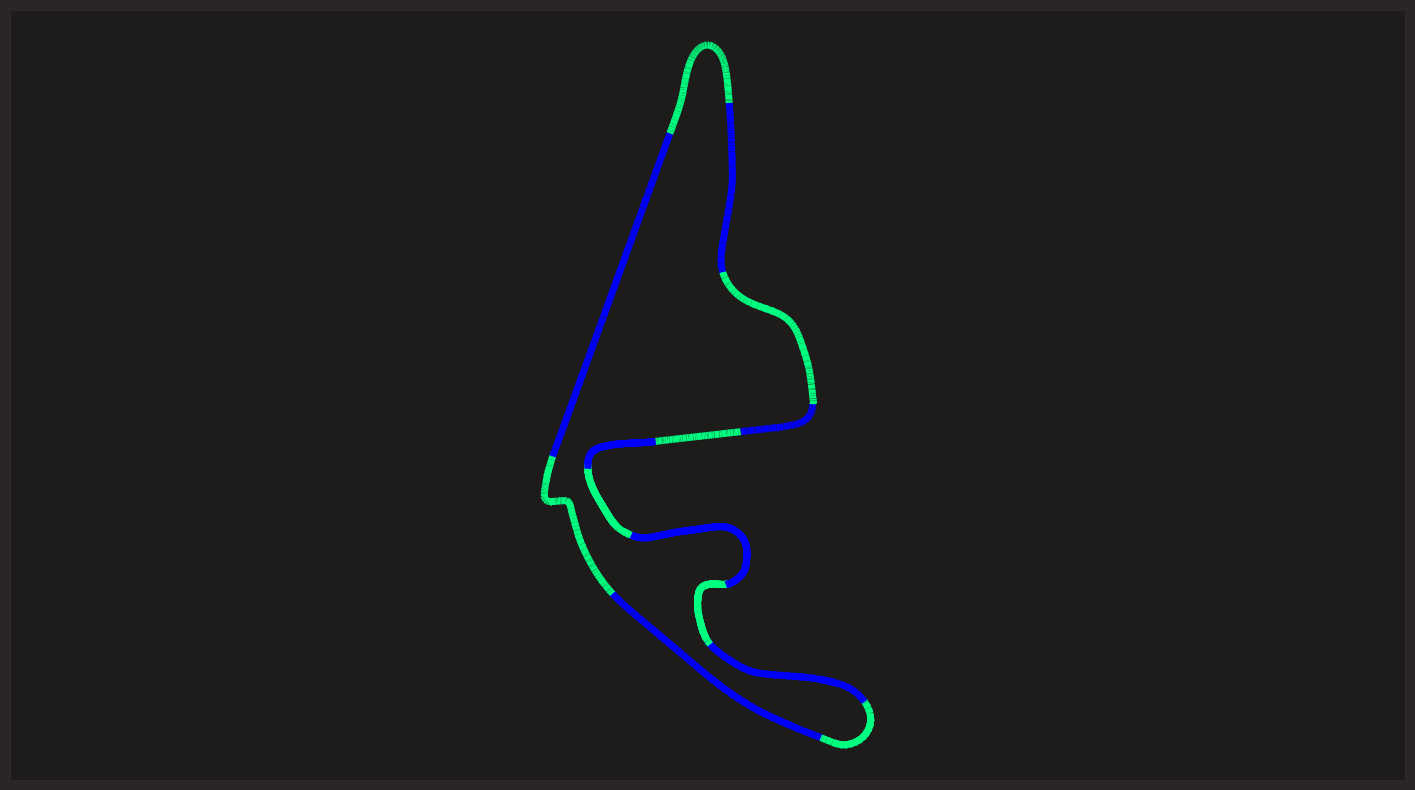

In [30]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

plt.show()